In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("/Users/devanshusingh/Downloads/Video_Games.csv")
pd.set_option("display.max_column",None)

In [85]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [86]:
df.shape

(16598, 11)

In [87]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [88]:
# Handle the missing values
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Impute missing values in categorical columns with mode
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

# Top 10 Best-Selling Video Games (Global Sales)
### Which Video Games Have the Highest Global Sales of All Time?

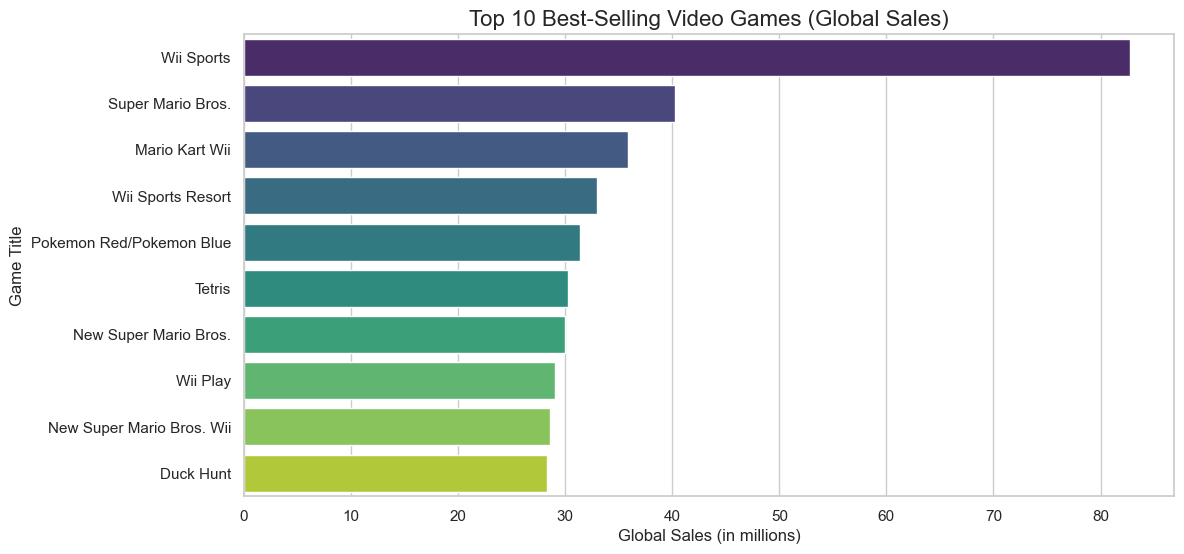

In [89]:

# Set style for visuals
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Top 10 games globally
top_games = df.sort_values(by="Global_Sales", ascending=False).head(10)

# Barplot
sns.barplot(data=top_games, y="Name", x="Global_Sales", palette="viridis")
plt.title("Top 10 Best-Selling Video Games (Global Sales)", fontsize=16)
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Title")
plt.show()


# Market Share of Game Genres by Global Sales
### What is the Market Share of Each Video Game Genre Based on Global Sales?

In [90]:

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales


Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

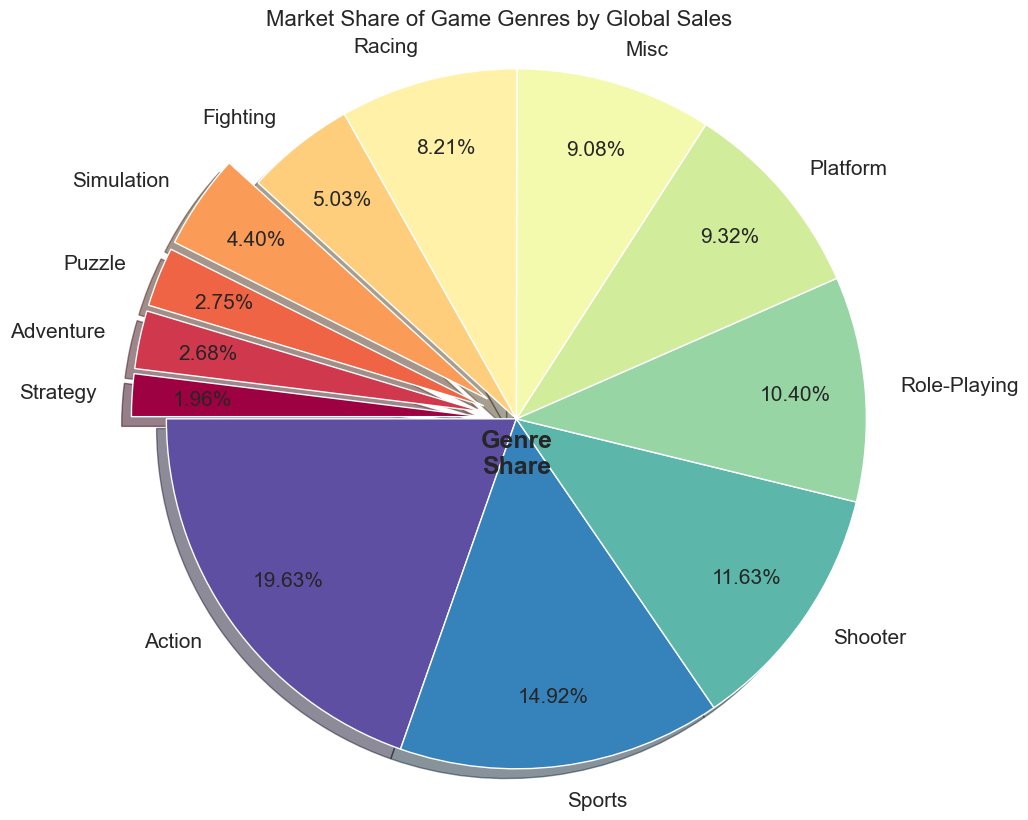

In [91]:
# Prepare for pie chart
labels = genre_sales.index
sizes = genre_sales.values
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(sizes)))
explode_list = [0, 0, 0, 0, 0, 0,0,0,0.1,0.1,0.1,0.1]

# Plot as donut chart
plt.figure(figsize=(10, 10))
plt.pie(
    sizes, 
    labels=labels,
    autopct='%0.2f%%', 
    startangle=180,
    colors=colors, 
    shadow=True,
    pctdistance= 0.8,
    textprops={'fontsize': 15},
    explode=explode_list
)

plt.text(0, -0.1, 'Genre\nShare', ha='center', va='center', fontsize=18, fontweight='bold')

plt.title("Market Share of Game Genres by Global Sales", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


# Regional Video Game Sales Over Time (1980–2016)


In [92]:
# Group by year and sum sales per region
region_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


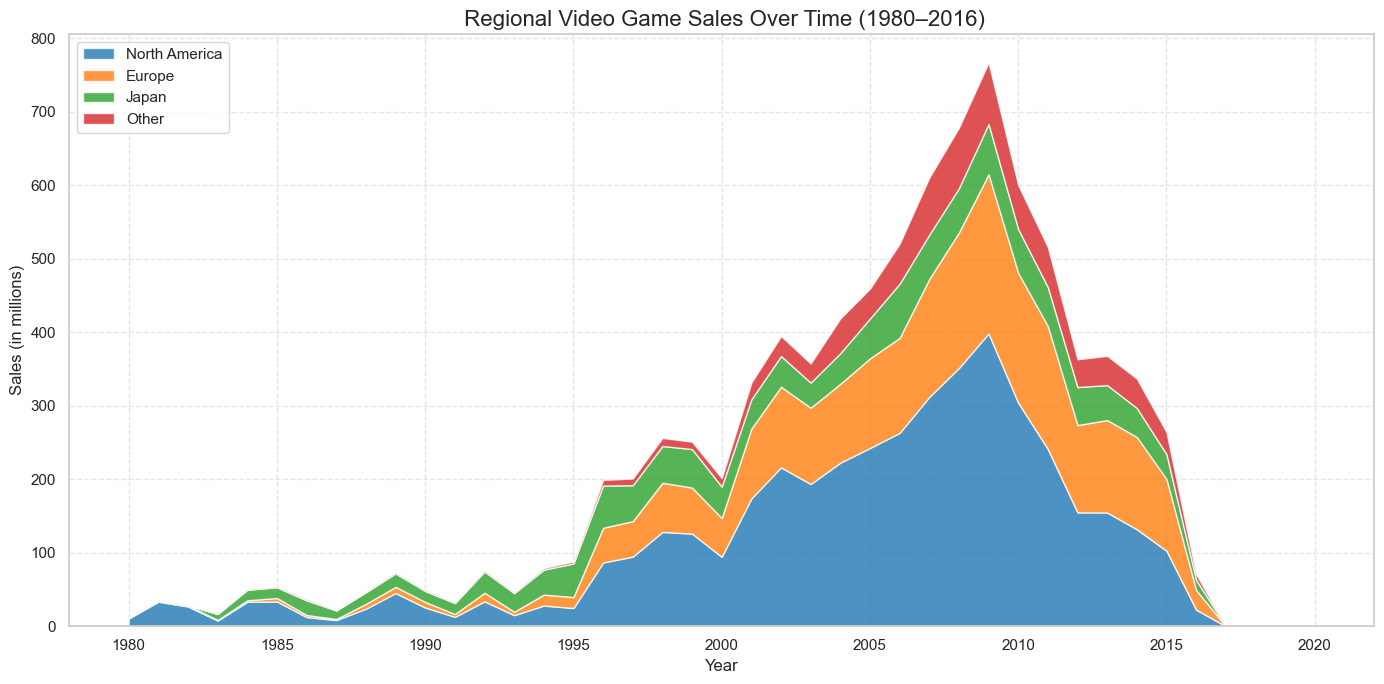

In [93]:
# Plot: stacked area chart
plt.figure(figsize=(14, 7))
plt.stackplot(region_sales.index,
              region_sales['NA_Sales'],
              region_sales['EU_Sales'],
              region_sales['JP_Sales'],
              region_sales['Other_Sales'],
              labels=['North America', 'Europe', 'Japan', 'Other'],
              alpha=0.8,
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Chart aesthetics
plt.title(' Regional Video Game Sales Over Time (1980–2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Total Global Sales by Genre
### Which Video Game Genres Have Generated the Highest Global Sales?

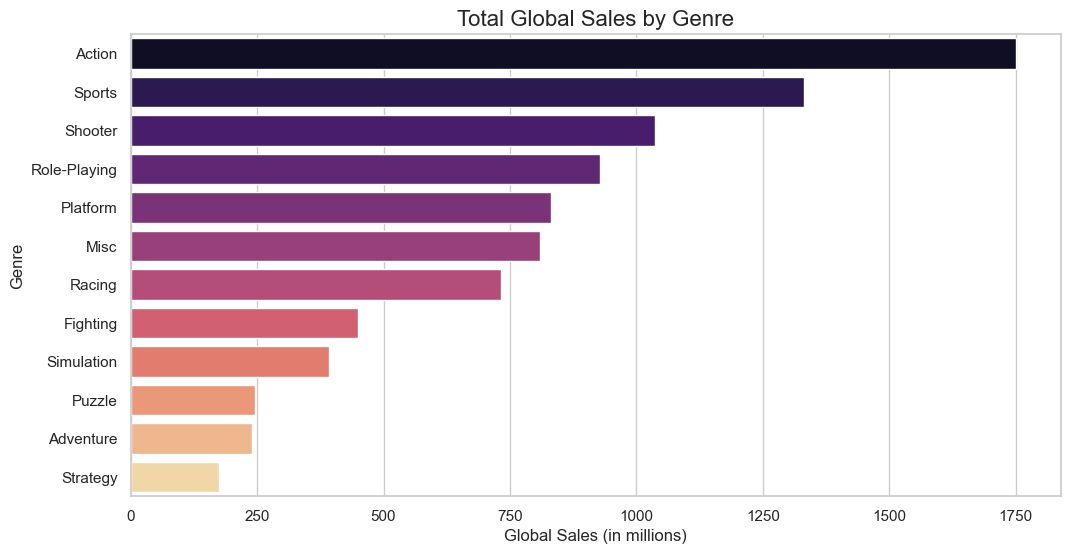

In [94]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='magma')
plt.title("Total Global Sales by Genre", fontsize=16)
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Genre")

plt.show()


## What is the geographical distribution of total video game sales across major regions?

In [95]:

# Total sales by region
region_sales = {
    'USA': df['NA_Sales'].sum(),
    'Germany': df['EU_Sales'].sum(),
    'Japan': df['JP_Sales'].sum(),
    'Brazil': df['Other_Sales'].sum()
}

# Country coordinates
country_coords = {
    'USA': [37.0902, -95.7129],
    'Germany': [51.1657, 10.4515],
    'Japan': [36.2048, 138.2529],
    'Brazil': [-14.2350, -51.9253]
}

# Create base map
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB dark_matter ')

# Maximum value for scaling
max_sales = max(region_sales.values())

# Add proportional circles
for country, sales in region_sales.items():
    folium.Circle(
        location=country_coords[country],
        radius=(sales / max_sales) * 1000000,  # Scaled radius (meters)
        popup=folium.Popup(f"<b>{country}</b><br>Total Sales: {sales:.2f} million units", max_width=200),
        color='white',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.6
    ).add_to(m)

# Show the map
m


 # Year-wise Sales
 ### Yearly Sales Trends: How have video game sales evolved over the years? Are they increasing or decreasing?

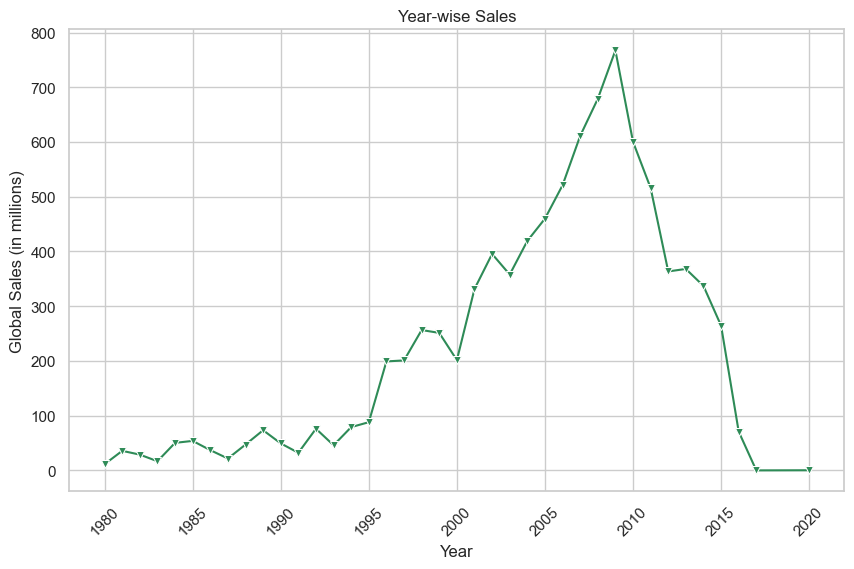

In [96]:
year_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_sales.index, y=year_sales.values,  marker='v', color='seagreen')
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Which Gaming Platforms Have the Most Game Releases?
### This chart helps reveal how many games were released on each platform, highlighting the most supported or popular platforms among game developers.

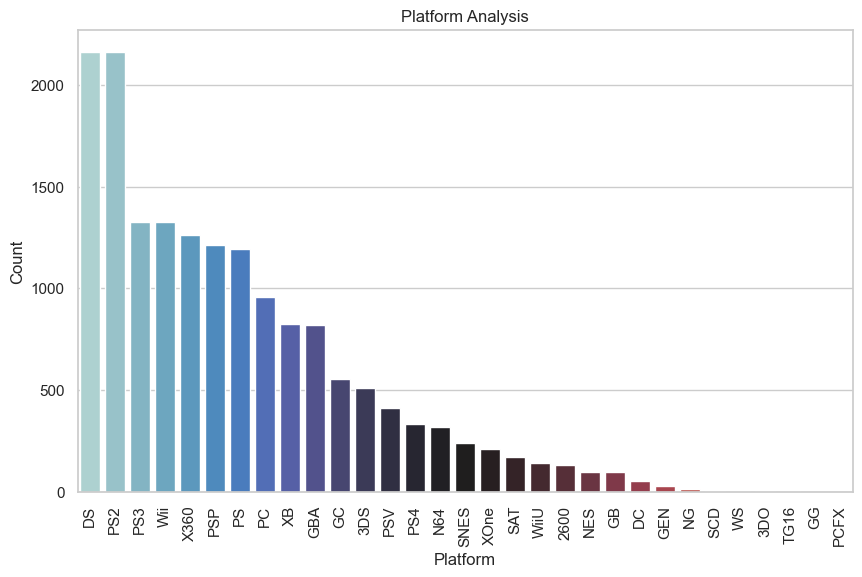

In [97]:
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="icefire")
plt.title('Platform Analysis')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## How Have Global Sales of the Top 5 Gaming Platforms Changed Over the Years?

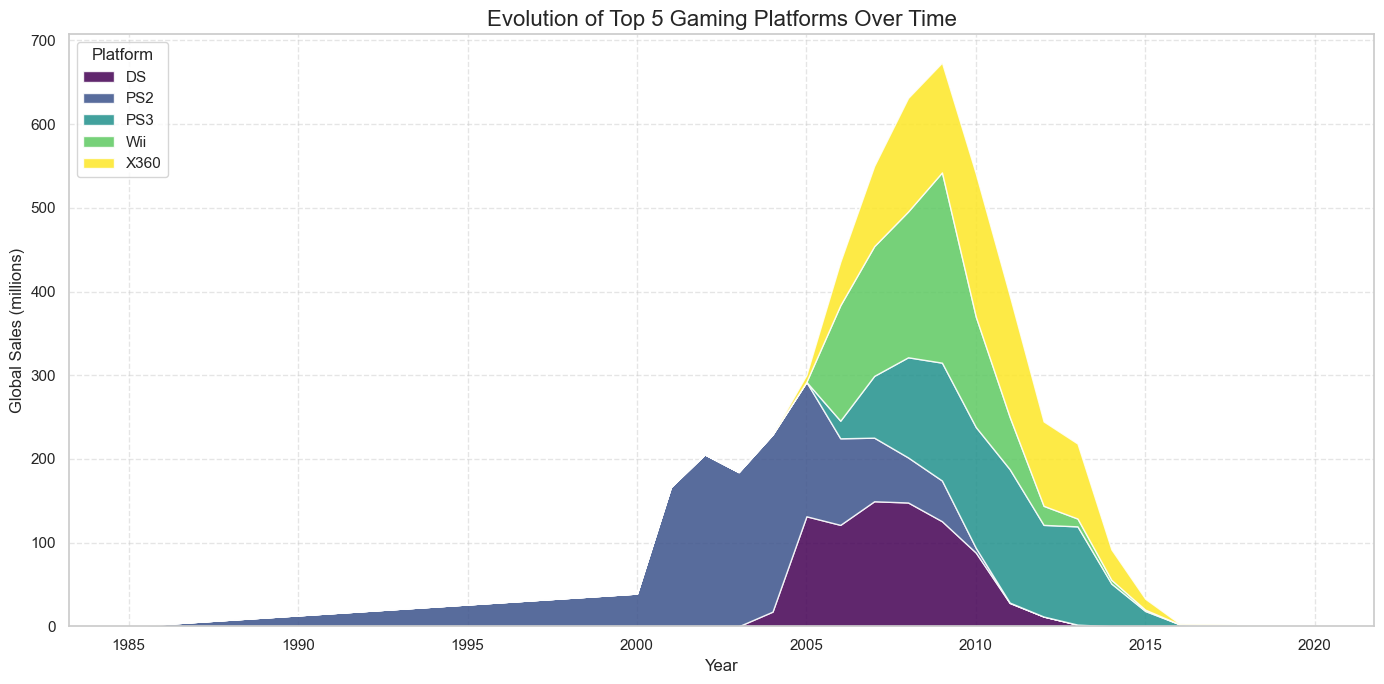

In [98]:

# Get top 5 platforms by global sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter data for only top platforms
filtered_df = df[df['Platform'].isin(top_platforms)]

# Group by Year and Platform
platform_yearly_sales = filtered_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().fillna(0)

# Ensure platforms are in the correct order (matching DataFrame columns)
ordered_platforms = platform_yearly_sales.columns.tolist()

# Generate colors using a colormap
colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(ordered_platforms)))

# Plotting the stackplot
plt.figure(figsize=(14, 7))
plt.stackplot(platform_yearly_sales.index,
              [platform_yearly_sales[platform] for platform in ordered_platforms],
              labels=ordered_platforms,
              colors=colors,
              alpha=0.85)

# Chart styling
plt.title("Evolution of Top 5 Gaming Platforms Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Platform", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 ## How Are the Numerical Features in the Dataset Correlated With Each Other?
 #### This correlation heatmap helps identify relationships between numerical variables, such as how strongly things like critic score, user score, or global sales are related.

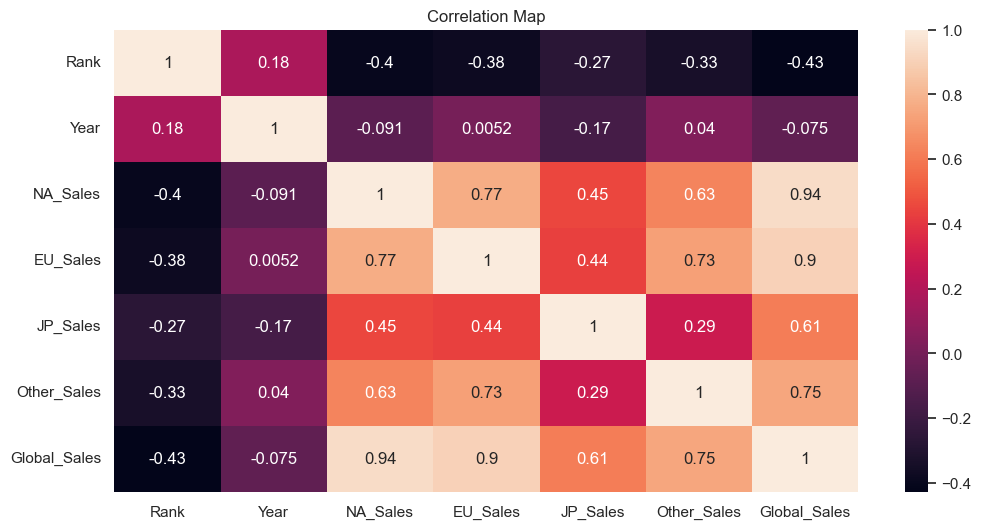

In [99]:
numerical_data=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(data=numerical_data.corr(), annot=True)
plt.title('Correlation Map')
plt.show()

## Sales by Region 
#### Which region (North America, Europe, Japan, Rest of the World) contributes the most to global video game sales?

In [100]:
region_sales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

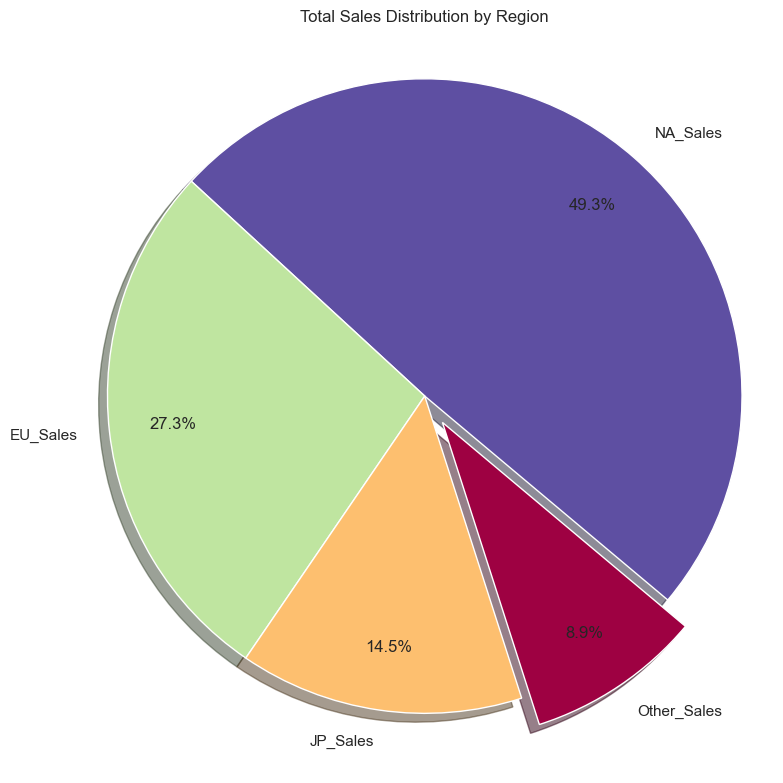

In [101]:
labels = region_sales.index
sizes = region_sales.values
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(sizes)))


explode_list = [0, 0, 0, 0.1]

plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors, 
        shadow=True,
        pctdistance=0.8,
        startangle=320,
        explode=explode_list 
)
plt.title('Total Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


### "What relationships or patterns can be observed between global sales, release year, and publishers of video games?"

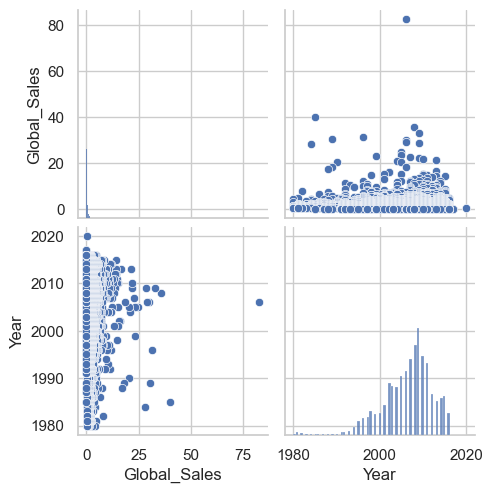

In [102]:
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

### Yearly Sales by Region: How have the sales trends evolved over the years in each region?

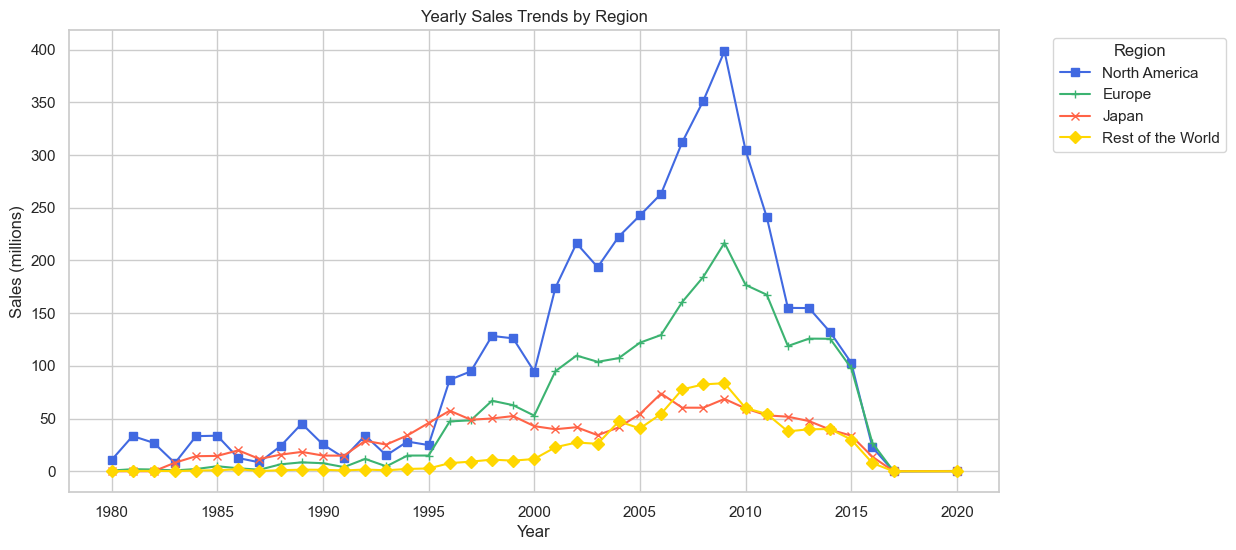

In [103]:
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']].sum()
# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'],label='North America', marker='s', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'],label='Europe', marker='+', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'],label='Japan', marker='x', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'],label='Rest of the World', marker='D', color='gold')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Top 10 Publishers
### Which Publishers Have Released the Most Video Games?
#### This bar chart shows the top 10 publishers based on the number of games they have released, helping to identify the most prolific companies in the video game industry.

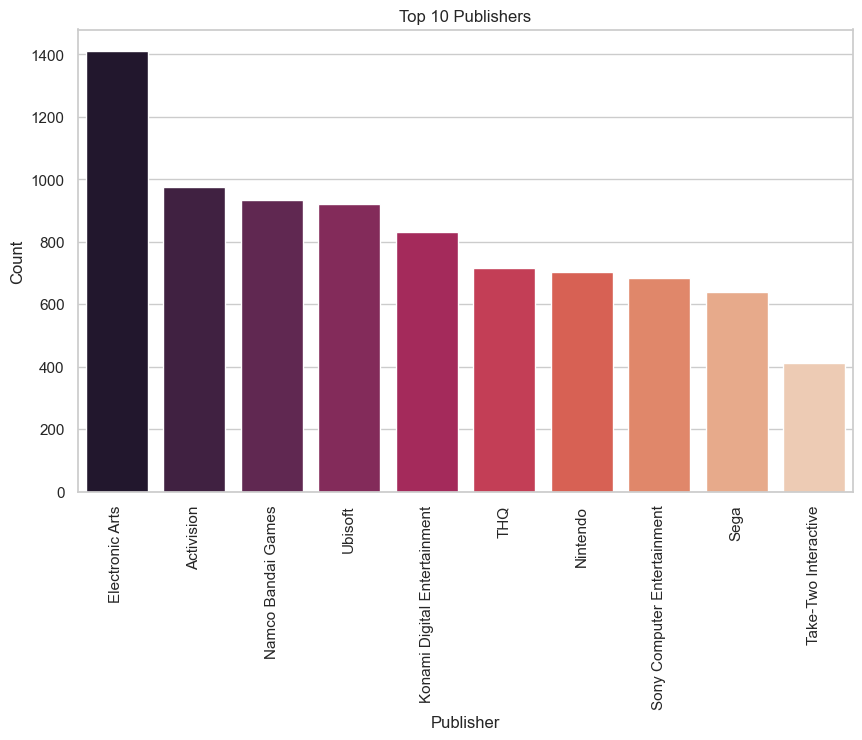

In [104]:
top_publishers = df['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values,palette="rocket")
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Region-wise Genre Dominance (Normalized)
### "How does the popularity of video game genres vary across different regions?"


<Figure size 1200x600 with 0 Axes>

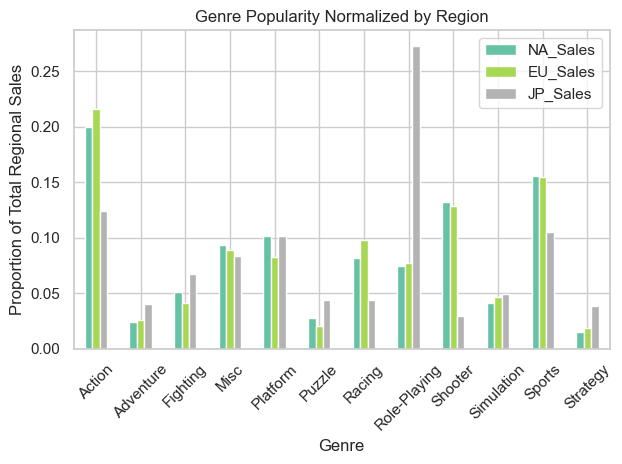

In [105]:
region_genre = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum()
region_genre_normalized = region_genre.div(region_genre.sum(axis=0), axis=1)
plt.figure(figsize=(12,6))
region_genre_normalized.plot(kind="bar", stacked=False, colormap="Set2")
plt.title("Genre Popularity Normalized by Region")
plt.ylabel("Proportion of Total Regional Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Platform Lifespan Analysis
### "Which platforms dominated the gaming market for the longest period?"

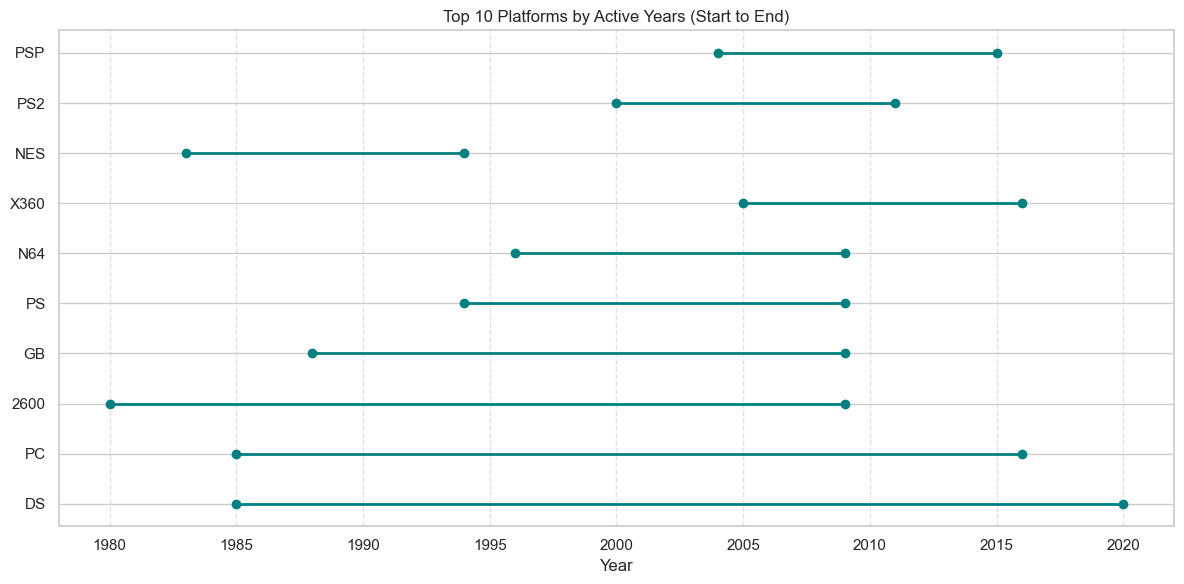

In [106]:
platform_lifespan = df.dropna(subset=["Year"]).groupby("Platform")["Year"].agg(["min", "max"])
platform_lifespan["Lifespan"] = platform_lifespan["max"] - platform_lifespan["min"]
platform_lifespan_sorted = platform_lifespan.sort_values("Lifespan", ascending=False).head(10)

# Reset index to use platform names for plotting
platform_lifespan_sorted = platform_lifespan_sorted.reset_index()

# Timeline-style plot
plt.figure(figsize=(12,6))
for i, row in platform_lifespan_sorted.iterrows():
    plt.plot([row["min"], row["max"]], [i, i], marker='o', color='teal', linewidth=2)

plt.yticks(range(len(platform_lifespan_sorted)), platform_lifespan_sorted["Platform"])
plt.xlabel("Year")
plt.title("Top 10 Platforms by Active Years (Start to End)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Genre Evolution Over Years
### "What trends can be observed in genre popularity from year to year in the gaming industry?"

<Figure size 1400x600 with 0 Axes>

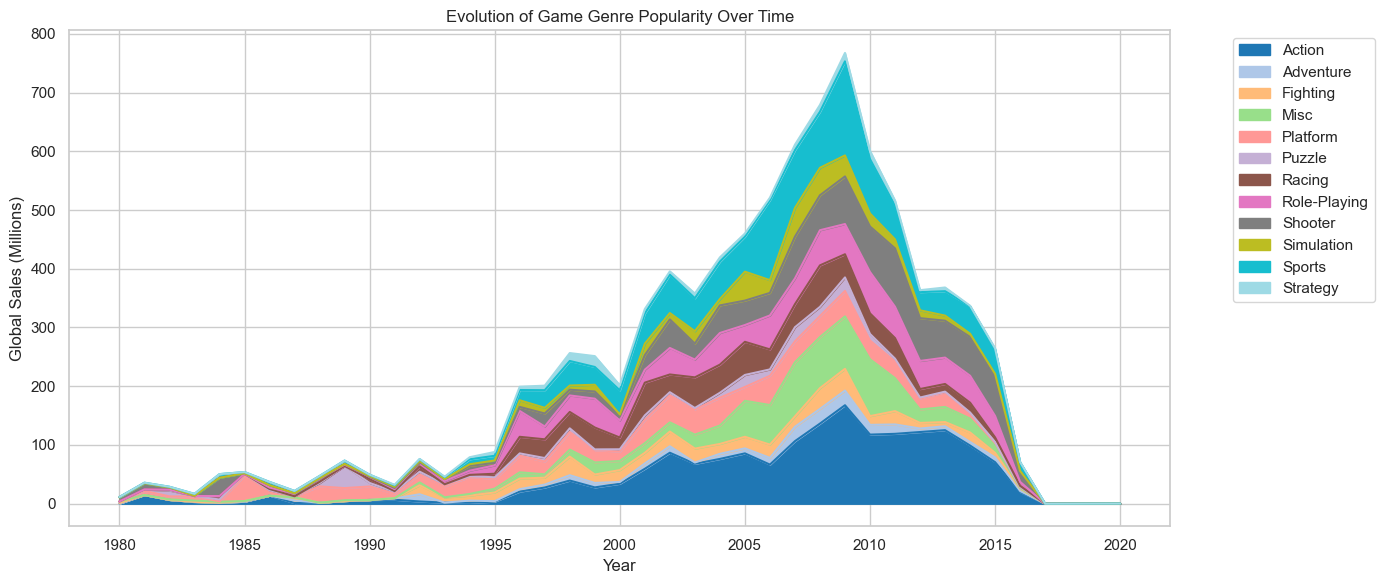

In [107]:
genre_evolution = df.dropna(subset=["Year"]).groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
genre_pivot = genre_evolution.pivot(index="Year", columns="Genre", values="Global_Sales").fillna(0)
plt.figure(figsize=(14,6))
genre_pivot.plot(kind="area", stacked=True, colormap="tab20", figsize=(14,6))
plt.title("Evolution of Game Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
